In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from thalesians.tsa.distrs import NormalDistr as N
import thalesians.tsa.filtering as filtering
import thalesians.tsa.filtering.kalman as kalman
import thalesians.tsa.filtering.visual as visual
import thalesians.tsa.numpyutils as npu
import thalesians.tsa.processes as proc
import thalesians.tsa.random as rnd
import thalesians.tsa.simulation as sim

In [4]:
rnd.random_state(np.random.RandomState(seed=42), force=True);

In [5]:
X = proc.OrnsteinUhlenbeckProcess.create_multiscale_from_vol(transition_vector=[20., 20.], mean=20., vol=[[10., .0], [.0, 2.]])

In [6]:
X.transition

array([[ 20.,   0.],
       [-20.,  20.]])

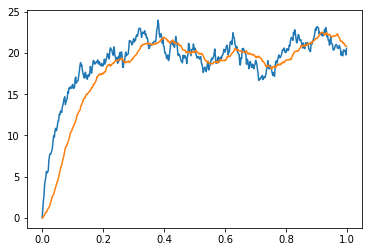

In [7]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=1., step=.002))
df = sim.run(em)
plt.plot(df);

In [8]:
filtr = filtering.kalman.KalmanFilter(time=df.index[0], state_distr=N(mean=npu.col(0., 0.), cov=1000. * np.eye(2)), process=X)
state_observable = filtr.create_identity_observable(X)
first_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[1., 0.]]), X)
last_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[0., 1.]]), X)

In [9]:
run_df = filtering.run(observable=last_observable, obss=1, df=df, return_df=True)

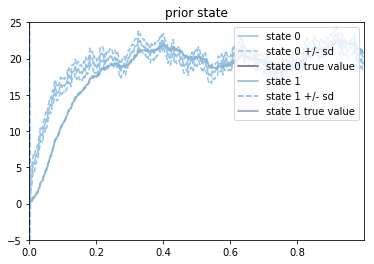

In [10]:
sp = visual.StatePlot(plot_obs_results=False)
sp.process_run_df(run_df)
sp.ax.set_ylim((-5, 25));

In [11]:
run_df

,time,filter_name,filter_type,observable_name,accepted,obs_mean,obs_cov,predicted_obs_mean,predicted_obs_cov,cross_cov,innov_mean,innov_cov,prior_state_mean,prior_state_cov,posterior_state_mean,posterior_state_cov,true_value,log_likelihood,gain
0,0.000,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,"[[0.0], [0.0]]","[[1000.0, 0.0], [0.0, 1000.0]]","[[0.0], [0.0]]","[[1000.0, 0.0], [0.0, 1000.0]]",None,NaN,None
1,0.000,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.000000,0.0,0.000000,1000.000000,"[[0.0, 1000.0]]",0.000000,1000.000000,"[[0.0], [0.0]]","[[1000.0, 0.0], [0.0, 1000.0]]","[[0.0], [0.0]]","[[1000.0, 0.0], [0.0, 1000.0]]",None,-4.372816,"[[0.0], [1.0]]"
2,0.002,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,-0.012367,0.0,0.015580,1.484775,"[[36.9284467878, 1.48477498657]]",-0.027946,1.484775,"[[0.784211216954], [0.0155796656317]]","[[923.308555521, 36.9284467878], [36.928446787...","[[0.784211216954], [0.0155796656317]]","[[923.308555521, 36.9284467878], [36.928446787...",None,-1.116833,"[[24.8714095549], [1.0]]"
3,0.004,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.165237,0.0,0.007124,0.014946,"[[0.182730958327, 0.0149463533918]]",0.158114,0.014946,"[[0.869860637766], [0.0071238140302]]","[[4.66565978276, 0.182730958327], [0.182730958...","[[0.869860637766], [0.0071238140302]]","[[4.66565978276, 0.182730958327], [0.182730958...",None,0.346385,"[[12.2257886949], [1.0]]"
4,0.006,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.220522,0.0,0.282059,0.011380,"[[0.0935800172902, 0.0113803157503]]",-0.061536,0.011380,"[[3.47723044416], [0.282058744076]]","[[2.43688625684, 0.0935800172902], [0.09358001...","[[3.47723044416], [0.282058744076]]","[[2.43688625684, 0.0935800172902], [0.09358001...",None,1.152624,"[[8.22297195819], [1.0]]"
5,0.008,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.387677,0.0,0.341644,0.010252,"[[0.0653603764496, 0.0102515301167]]",0.046033,0.010252,"[[3.63892605496], [0.341643752647]]","[[1.73139523582, 0.0653603764496], [0.06536037...","[[3.63892605496], [0.341643752647]]","[[1.73139523582, 0.0653603764496], [0.06536037...",None,1.267872,"[[6.37567033463], [1.0]]"
6,0.010,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.583989,0.0,0.539185,0.009731,"[[0.0523370002198, 0.0097305950675]]",0.044804,0.009731,"[[4.56243783899], [0.539184714648]]","[[1.40581083008, 0.0523370002198], [0.05233700...","[[4.56243783899], [0.539184714648]]","[[1.40581083008, 0.0523370002198], [0.05233700...",None,1.294153,"[[5.37860221875], [1.0]]"
7,0.012,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.699334,0.0,0.761273,0.009449,"[[0.0453077240938, 0.00944942402246]]",-0.061939,0.009449,"[[5.39928652259], [0.761272754762]]","[[1.23007892693, 0.0453077240938], [0.04530772...","[[5.39928652259], [0.761272754762]]","[[1.23007892693, 0.0453077240938], [0.04530772...",None,1.208963,"[[4.79476039874], [1.0]]"
8,0.014,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.697088,0.0,0.883582,0.009285,"[[0.0411916709362, 0.00928478189616]]",-0.186494,0.009285,"[[5.68645060507], [0.883581669978]]","[[1.12717759799, 0.0411916709362], [0.04119167...","[[5.68645060507], [0.883581669978]]","[[1.12717759799, 0.0411916709362], [0.04119167...",None,-0.452204,"[[4.43647157218], [1.0]]"
9,0.016,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.844222,0.0,0.872076,0.009184,"[[0.038665754146

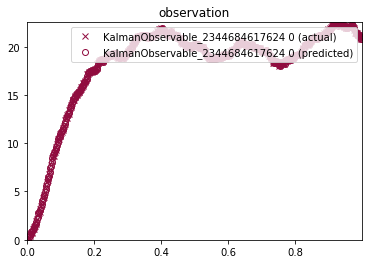

In [12]:
op = visual.ObsPlot();
op.process_run_df(run_df[1:])

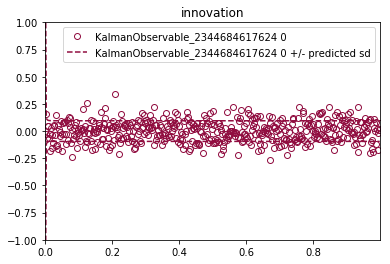

In [13]:
ep = visual.InnovPlot()
ep.process_run_df(run_df[1:])
ep.ax.set_ylim((-1, 1));

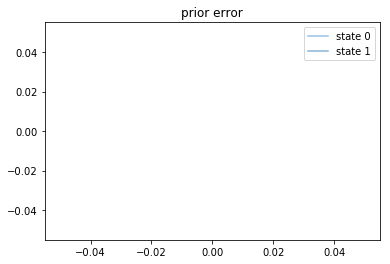

In [14]:
llp = visual.ErrorPlot();
llp.process_run_df(run_df[1:])

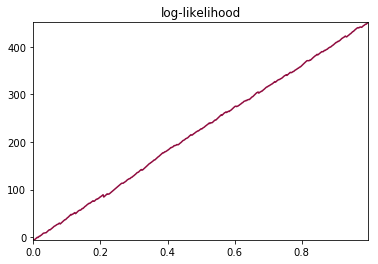

In [15]:
llp = visual.LogLikelihoodPlot(cumulative=True);
llp.process_run_df(run_df)

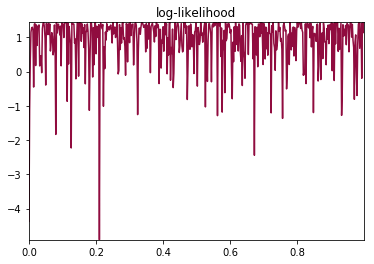

In [36]:
llp = visual.LogLikelihoodPlot(cumulative=False)
llp.process_run_df(run_df)

In [17]:
run_df

,time,filter_name,filter_type,observable_name,accepted,obs_mean,obs_cov,predicted_obs_mean,predicted_obs_cov,cross_cov,innov_mean,innov_cov,prior_state_mean,prior_state_cov,posterior_state_mean,posterior_state_cov,true_value,log_likelihood,gain
0,0.000,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,"[[0.0], [0.0]]","[[1000.0, 0.0], [0.0, 1000.0]]","[[0.0], [0.0]]","[[1000.0, 0.0], [0.0, 1000.0]]",None,NaN,None
1,0.000,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.000000,0.0,0.000000,1000.000000,"[[0.0, 1000.0]]",0.000000,1000.000000,"[[0.0], [0.0]]","[[1000.0, 0.0], [0.0, 1000.0]]","[[0.0], [0.0]]","[[1000.0, 0.0], [0.0, 1000.0]]",None,-4.372816,"[[0.0], [1.0]]"
2,0.002,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,-0.012367,0.0,0.015580,1.484775,"[[36.9284467878, 1.48477498657]]",-0.027946,1.484775,"[[0.784211216954], [0.0155796656317]]","[[923.308555521, 36.9284467878], [36.928446787...","[[0.784211216954], [0.0155796656317]]","[[923.308555521, 36.9284467878], [36.928446787...",None,-1.116833,"[[24.8714095549], [1.0]]"
3,0.004,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.165237,0.0,0.007124,0.014946,"[[0.182730958327, 0.0149463533918]]",0.158114,0.014946,"[[0.869860637766], [0.0071238140302]]","[[4.66565978276, 0.182730958327], [0.182730958...","[[0.869860637766], [0.0071238140302]]","[[4.66565978276, 0.182730958327], [0.182730958...",None,0.346385,"[[12.2257886949], [1.0]]"
4,0.006,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.220522,0.0,0.282059,0.011380,"[[0.0935800172902, 0.0113803157503]]",-0.061536,0.011380,"[[3.47723044416], [0.282058744076]]","[[2.43688625684, 0.0935800172902], [0.09358001...","[[3.47723044416], [0.282058744076]]","[[2.43688625684, 0.0935800172902], [0.09358001...",None,1.152624,"[[8.22297195819], [1.0]]"
5,0.008,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.387677,0.0,0.341644,0.010252,"[[0.0653603764496, 0.0102515301167]]",0.046033,0.010252,"[[3.63892605496], [0.341643752647]]","[[1.73139523582, 0.0653603764496], [0.06536037...","[[3.63892605496], [0.341643752647]]","[[1.73139523582, 0.0653603764496], [0.06536037...",None,1.267872,"[[6.37567033463], [1.0]]"
6,0.010,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.583989,0.0,0.539185,0.009731,"[[0.0523370002198, 0.0097305950675]]",0.044804,0.009731,"[[4.56243783899], [0.539184714648]]","[[1.40581083008, 0.0523370002198], [0.05233700...","[[4.56243783899], [0.539184714648]]","[[1.40581083008, 0.0523370002198], [0.05233700...",None,1.294153,"[[5.37860221875], [1.0]]"
7,0.012,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.699334,0.0,0.761273,0.009449,"[[0.0453077240938, 0.00944942402246]]",-0.061939,0.009449,"[[5.39928652259], [0.761272754762]]","[[1.23007892693, 0.0453077240938], [0.04530772...","[[5.39928652259], [0.761272754762]]","[[1.23007892693, 0.0453077240938], [0.04530772...",None,1.208963,"[[4.79476039874], [1.0]]"
8,0.014,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.697088,0.0,0.883582,0.009285,"[[0.0411916709362, 0.00928478189616]]",-0.186494,0.009285,"[[5.68645060507], [0.883581669978]]","[[1.12717759799, 0.0411916709362], [0.04119167...","[[5.68645060507], [0.883581669978]]","[[1.12717759799, 0.0411916709362], [0.04119167...",None,-0.452204,"[[4.43647157218], [1.0]]"
9,0.016,KalmanFilter_2344684560624,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2344684617624,True,0.844222,0.0,0.872076,0.009184,"[[0.038665754146

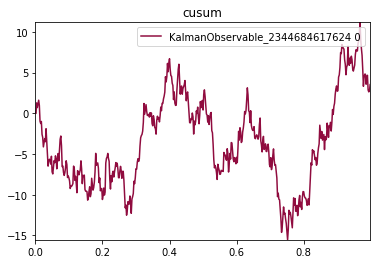

In [18]:
cp = visual.CUSUMPlot()
cp.process_run_df(run_df)

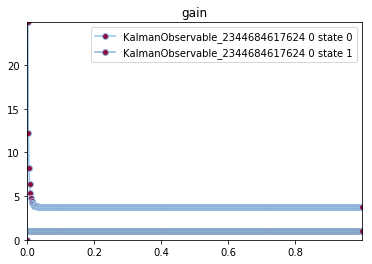

In [33]:
gp = visual.GainPlot(matrix_norm=False)
gp.process_run_df(run_df)

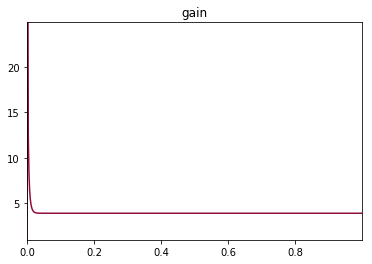

In [34]:
gp = visual.GainPlot(matrix_norm=True)
gp.process_run_df(run_df)

In [20]:
filtr = filtering.kalman.KalmanFilter(time=df.index[0], state_distr=N(mean=npu.col(0., 0.), cov=1000. * np.eye(2)), process=X)
state_observable = filtr.create_identity_observable(X)
first_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[1., 0.]]), X)
last_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[0., 1.]]), X)

In [22]:
ts, priors, posteriors, prior_values, posterior_values = [], [], [], [], []
for i, t in enumerate(df.index):
    ts.append(t)
    priors.append(state_observable.predict(t))
    prior_values.append(priors[-1].distr.mean.flatten())
    process_value = df.iloc[i].values
    last_observable.observe(N(process_value[-1], 0.), t)
    posteriors.append(state_observable.predict(t))
    posterior_values.append(posteriors[-1].distr.mean.flatten())
priors_df = pd.DataFrame(data=priors, index=ts)
posteriors_df = pd.DataFrame(data=posteriors, index=ts)
prior_values_df = pd.DataFrame(data=prior_values, index=ts)
posterior_values_df = pd.DataFrame(data=posterior_values, index=ts)

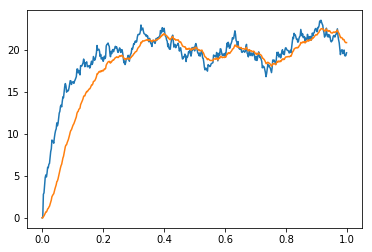

In [23]:
plt.plot(posterior_values_df);

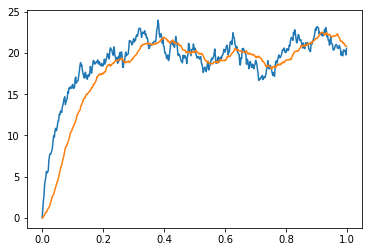

In [24]:
plt.plot(df);